In [1]:
google_colab_flag = True # Make it False if do not intend to use Google Colab and want to train in local machine!!

# For training in Google Colab
if(google_colab_flag):
  from google.colab import drive
  drive.mount('/content/drive')
  !ls
  import sys
  root_path = '/content/drive/MyDrive/Stratified-k-fold-cross-validation/' # This is the path to where in google drive the code is stored!
  sys.path.append(root_path)

# For local training
else:
  root_path = ''

Mounted at /content/drive
drive  sample_data


# Add all necessary libraries!

In [2]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import StratifiedKFold
from PIL import Image
import random
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Activation, ReLU, add
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, Reshape, Concatenate, Lambda
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.compat.v1 import ConfigProto, InteractiveSession
from glob import glob
import warnings
import os
import shutil
from PIL import ImageFile
warnings.simplefilter('error', Image.DecompressionBombWarning)
ImageFile.LOAD_TRUNCATED_IMAGES = True
from PIL import Image
Image.MAX_IMAGE_PIXELS = 1000000000
config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [3]:
datasetFolderName=root_path +'DS'
sourceFiles=[]
classLabels=['circles', 'squares', 'triangles']
X=[]
Y=[]

img_rows, img_cols =  100, 100 # input image dimensions
train_path=datasetFolderName+'/train/'
validation_path=datasetFolderName+'/validation/'
test_path=datasetFolderName+'/test/'

In [4]:
def transferBetweenFolders(source, dest, splitRate): 
    global sourceFiles
    sourceFiles=os.listdir(source)
    if(len(sourceFiles)!=0):
        transferFileNumbers=int(len(sourceFiles)*splitRate)
        transferIndex=random.sample(range(0, len(sourceFiles)), transferFileNumbers)
        for eachIndex in transferIndex:
            shutil.move(source+str(sourceFiles[eachIndex]), dest+str(sourceFiles[eachIndex]))
    else:
        print("No file moved. Source empty!")
        
def transferAllClassBetweenFolders(source, dest, splitRate):
    for label in classLabels:
        transferBetweenFolders(datasetFolderName+'/'+source+'/'+label+'/', 
                               datasetFolderName+'/'+dest+'/'+label+'/', 
                               splitRate)

def my_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1Score = f1_score(y_true, y_pred, average='weighted') 
    print("Accuracy  : {}".format(accuracy))
    print("Precision : {}".format(precision))
    print("recall : {}".format(recall))
    print("f1Score : {}".format(f1Score))
    cm = confusion_matrix(y_true, y_pred)
    print(cm)
    return accuracy, precision, recall, f1Score

# First, check if test folder is empty or not, if not transfer all existing files to train.

In [5]:
transferAllClassBetweenFolders('test', 'train', 1.0)

No file moved. Source empty!
No file moved. Source empty!
No file moved. Source empty!


# Now, split some part of train data into the test folders.

In [6]:
transferAllClassBetweenFolders('train', 'test', 0.2)

In [7]:
def prepareNameWithLabels(folderName):
    sourceFiles=os.listdir(datasetFolderName+'/train/'+folderName)
    for val in sourceFiles:
        X.append(val)
        for i in range(len(classLabels)):
          if(folderName==classLabels[i]):
              Y.append(i)

In [8]:
# Organize file names and class labels in X and Y variables
for i in range(len(classLabels)):
  prepareNameWithLabels(classLabels[i])

In [9]:
X=np.asarray(X)
Y=np.asarray(Y)

In [10]:
# Note that, this model structure is a very basic one. To achieve better performance, you should change the model structure and hyperparameters according to your needs and data.
batch_size = 512
epoch = 100
activationFunction='elu'
def getModel():
    model = Sequential()
    model.add(Conv2D(64, (3, 3), padding='same', activation=activationFunction, input_shape=(img_rows, img_cols, 3)))
    model.add(Conv2D(64, (3, 3), activation=activationFunction))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
 
    model.add(Conv2D(32, (3, 3), padding='same', activation=activationFunction))
    model.add(Conv2D(32, (3, 3), activation=activationFunction))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
 
    model.add(Conv2D(16, (3, 3), padding='same', activation=activationFunction))
    model.add(Conv2D(16, (3, 3), activation=activationFunction))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
 
    model.add(Flatten())
    model.add(Dense(64, activation=activationFunction))
    model.add(Dropout(0.1))                  
    model.add(Dense(32, activation=activationFunction))
    model.add(Dropout(0.1))
    model.add(Dense(16, activation=activationFunction))
    model.add(Dropout(0.1))
    model.add(Dense(len(classLabels), activation='softmax')) 
    
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

# **Stratified K-Fold Cross validation**

No file moved. Source empty!
No file moved. Source empty!
No file moved. Source empty!
Results for fold 1
Found 160 images belonging to 3 classes.
Found 80 images belonging to 3 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/100
1/1 [==============================] - 64s 64s/step - loss: 0.7888 - accuracy: 0.3187 - val_loss: 0.6738 - val_accuracy: 0.3375
Epoch 2/100
1/1 [==============================] - 1s 837ms/step - loss: 0.8073 - accuracy: 0.3313 - val_loss: 0.7466 - val_accuracy: 0.3250
Epoch 3/100
1/1 [==============================] - 1s 834ms/step - loss: 0.7394 - accuracy: 0.3250 - val_loss: 0.7521 - val_accuracy: 0.3250
Epoch 4/100
1/1 [==============================] - 1s 834ms/step - loss: 0.6833 - accuracy: 0.3500 - val_loss: 0.6660 - val_accuracy: 0.3375
Epoch 5/100
1/1 [==============================] - 1s 820ms/step - loss: 0.6915 - accuracy: 0.2812 - val_loss: 0.6443 - val_accuracy: 0.3375
Epoch 6/100
1/1 [==============================] - 1s 823ms/step - loss: 0.7006 - accuracy: 0.3875 - val_loss: 0.6534 - val_accuracy: 0.3375
Epoch 7/100
1/1 [==============================] - 1s 819ms/step - loss: 0.6784 - accuracy: 0.3812 - val_loss: 0.6855 - val_accuracy: 0.3375
Epoch 8/100
1/

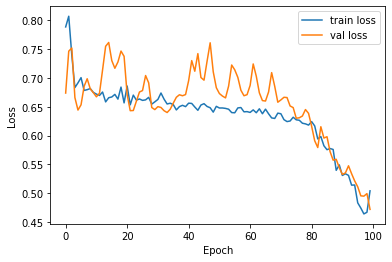

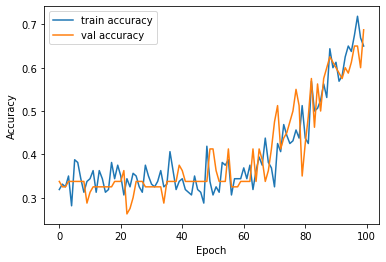

==============TEST RESULTS============
Found 60 images belonging to 3 classes.
1/1 [==============================] - 1s 671ms/step
Accuracy  : 0.7333333333333333
Precision : 0.7398550724637681
recall : 0.7333333333333333
f1Score : 0.7197997416020672
[[15  2  3]
 [ 0 20  0]
 [10  1  9]]
1/1 [==============================] - 0s 113ms/step


<Figure size 432x288 with 0 Axes>

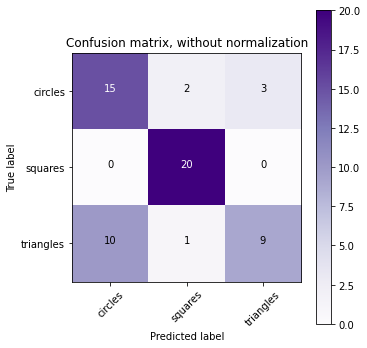

<Figure size 432x288 with 0 Axes>

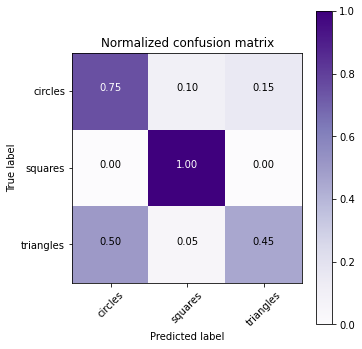

Results for fold 2
Found 160 images belonging to 3 classes.
Found 80 images belonging to 3 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 0.7428 - accuracy: 0.3438 - val_loss: 0.6422 - val_accuracy: 0.3375
Epoch 2/100
1/1 [==============================] - 1s 817ms/step - loss: 0.6844 - accuracy: 0.3625 - val_loss: 0.8195 - val_accuracy: 0.3375
Epoch 3/100
1/1 [==============================] - 1s 837ms/step - loss: 0.7075 - accuracy: 0.3812 - val_loss: 0.6503 - val_accuracy: 0.3375
Epoch 4/100
1/1 [==============================] - 1s 864ms/step - loss: 0.6929 - accuracy: 0.3313 - val_loss: 0.6445 - val_accuracy: 0.2875
Epoch 5/100
1/1 [==============================] - 1s 864ms/step - loss: 0.6769 - accuracy: 0.3625 - val_loss: 0.6375 - val_accuracy: 0.3375
Epoch 6/100
1/1 [==============================] - 1s 825ms/step - loss: 0.6968 - accuracy: 0.3375 - val_loss: 0.6414 - val_accuracy: 0.3375
Epoch 7/100
1/1 [==============================] - 1s 816ms/step - loss: 0.6805 - accuracy: 0.3375 - val_loss: 0.6572 - val_accuracy: 0.3375
Epoch 8/100
1/1 

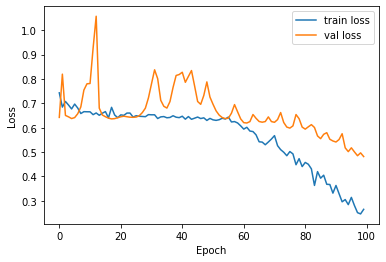

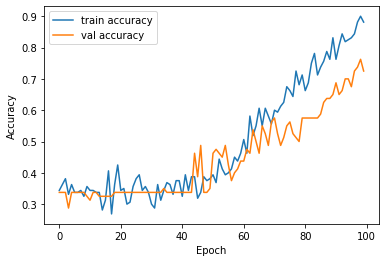

==============TEST RESULTS============
Found 60 images belonging to 3 classes.
1/1 [==============================] - 0s 180ms/step
Accuracy  : 0.8
Precision : 0.836996336996337
recall : 0.8
f1Score : 0.8016860010497339
[[17  3  0]
 [ 2 18  0]
 [ 7  0 13]]
1/1 [==============================] - 0s 106ms/step


<Figure size 432x288 with 0 Axes>

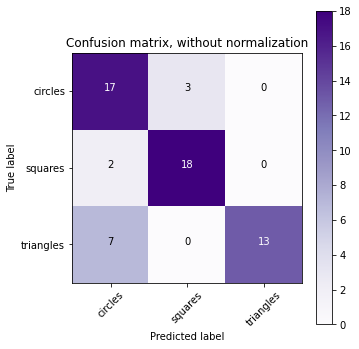

<Figure size 432x288 with 0 Axes>

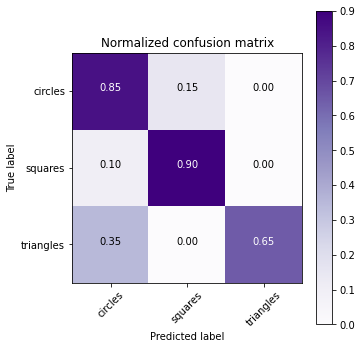

Results for fold 3
Found 160 images belonging to 3 classes.
Found 80 images belonging to 3 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 0.7792 - accuracy: 0.3688 - val_loss: 0.7242 - val_accuracy: 0.3250
Epoch 2/100
1/1 [==============================] - 1s 855ms/step - loss: 0.9163 - accuracy: 0.3187 - val_loss: 1.4760 - val_accuracy: 0.3375
Epoch 3/100
1/1 [==============================] - 1s 841ms/step - loss: 1.4666 - accuracy: 0.3313 - val_loss: 0.8402 - val_accuracy: 0.3375
Epoch 4/100
1/1 [==============================] - 1s 847ms/step - loss: 0.9043 - accuracy: 0.3250 - val_loss: 0.8048 - val_accuracy: 0.3250
Epoch 5/100
1/1 [==============================] - 1s 884ms/step - loss: 0.7905 - accuracy: 0.3313 - val_loss: 0.7819 - val_accuracy: 0.3250
Epoch 6/100
1/1 [==============================] - 1s 837ms/step - loss: 0.7956 - accuracy: 0.3625 - val_loss: 0.6867 - val_accuracy: 0.3250
Epoch 7/100
1/1 [==============================] - 1s 847ms/step - loss: 0.7287 - accuracy: 0.3562 - val_loss: 0.6568 - val_accuracy: 0.2875
Epoch 8/100
1/1 

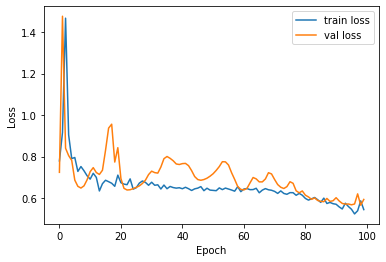

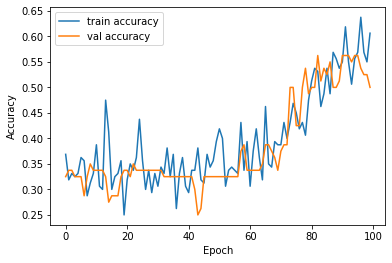

==============TEST RESULTS============
Found 60 images belonging to 3 classes.
1/1 [==============================] - 0s 201ms/step
Accuracy  : 0.7
Precision : 0.7650103519668737
recall : 0.7
f1Score : 0.6894546912590216
[[15  0  5]
 [ 6  9  5]
 [ 2  0 18]]
1/1 [==============================] - 0s 111ms/step


<Figure size 432x288 with 0 Axes>

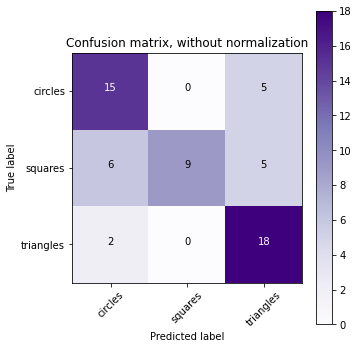

<Figure size 432x288 with 0 Axes>

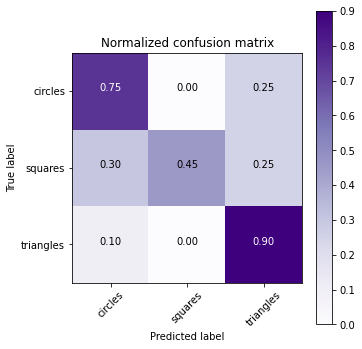

In [11]:
# ===============Stratified K-Fold======================
skf = StratifiedKFold(n_splits=3, shuffle=True)
skf.get_n_splits(X, Y)
foldNum=0
for train_index, val_index in skf.split(X, Y):
    #First cut all images from validation to train (if any exists)
    transferAllClassBetweenFolders('validation', 'train', 1.0)
    foldNum+=1
    print("Results for fold",foldNum)
    X_train, X_val = X[train_index], X[val_index]
    Y_train, Y_val = Y[train_index], Y[val_index]
    # Move validation images of this fold from train folder to the validation folder
    for eachIndex in range(len(X_val)):
        classLabel=''
        for i in range(len(classLabels)):
          if(Y_val[eachIndex]==i):
              classLabel=classLabels[i]
        #Then, copy the validation images to the validation folder
        shutil.move(datasetFolderName+'/train/'+classLabel+'/'+X_val[eachIndex], 
                    datasetFolderName+'/validation/'+classLabel+'/'+X_val[eachIndex])
        
    train_datagen = ImageDataGenerator(
                      rescale=1./255,
                      zoom_range=0.20,
                      fill_mode="nearest")
    validation_datagen = ImageDataGenerator(rescale=1./255)
    test_datagen = ImageDataGenerator(rescale=1./255)
        
    #Start ImageClassification Model
    train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical',
        subset='training')

    validation_generator = validation_datagen.flow_from_directory(
        validation_path,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical')   
    
    model=getModel()   
    # fit model
    history=model.fit_generator(train_generator, 
                                validation_data=validation_generator,
                                epochs=epoch)
    
    result = pd.DataFrame(history.history)
    result.to_csv(root_path + 'training_history_fold_{}.csv'.format(foldNum))

    # loss
    fig, axes = plt.subplots(1, 1, figsize=(6, 4))
    plt.plot(history.history['loss'], label='train loss')
    plt.plot(history.history['val_loss'], label='val loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
#    fig.savefig('loss_fold_{}'.format(foldNum), dpi=3000)

    # accuracy
    fig, axes = plt.subplots(1, 1, figsize=(6, 4))
    plt.plot(history.history['accuracy'], label='train accuracy')
    plt.plot(history.history['val_accuracy'], label='val accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
#    fig.savefig('accuracy_fold_{}'.format(foldNum), dpi=3000)

    MODEL_FILENAME=root_path + "model_fold_{}.h5".format(foldNum)

    print("==============TEST RESULTS============")
    test_generator = test_datagen.flow_from_directory(
            test_path,
            target_size=(img_rows, img_cols),
            batch_size=batch_size,
            class_mode=None,
            shuffle=False) 
    predictions = model.predict(test_generator, verbose=1)
    yPredictions = np.argmax(predictions, axis=1)
    true_classes = test_generator.classes

    testAcc,testPrec, testRecall, testFScore = my_metrics(true_classes, yPredictions)
    model.save(MODEL_FILENAME)

    Y_pred = model.predict(test_generator, verbose=1)

    import itertools
    def plot_confusion_matrix(cm, classes,
                              normalize=False,
                              title='Confusion matrix',
                              cmap=plt.cm.Purples):
        """
        This function prints and plots the confusion matrix.
        Normalization can be applied by setting `normalize=True`.
        """
        if normalize:
            cm = cm.astype('float') / cm.sum(axis=1, keepdims = True)

        plt.figure(figsize=(5, 5))
        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=45)
        plt.yticks(tick_marks, classes)

        fmt = '.2f' if normalize else 'd'
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, format(cm[i, j], fmt),
                    horizontalalignment="center",
                    color="white" if cm[i, j] > thresh else "black")

        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')

    cm = confusion_matrix(y_true = test_generator.classes, y_pred = np.argmax(Y_pred, axis = -1))
    class_names = ['circles', 'squares', 'triangles']

    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cm, classes=class_names,
                          title='Confusion matrix, without normalization')
    plt.show()
    #fig.savefig('confusion_matrix_densenet_0', dpi=3000)

    # Plot normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cm, classes=class_names, normalize=True,
                          title='Normalized confusion matrix')
    plt.show()
    #fig.savefig('confusion_matrix_densenet_1', dpi=3000)